<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/09_Gapminder_Data_Regression_Model_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gapminder Data: Linear Regression Model - Supervised Machine Learning**

The Gapminder Dataset describes life expentency depending on factors like fertility, GDP, Region, population etc.

The dataset is imported from Kaggle.

https://www.kaggle.com/

Installing Kaggle Package to access the Gapminder dataset from Kaggle.

In [0]:
!pip install kaggle

Make .kaggle directory under root to import the Kaggle Authentication JSON.

In [0]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Change file path to root/.kaggle/kaggle.json

In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

Protect Kaggle JSON file for security reasons

Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that, (U)ser / owner can read, can write and can't execute. (G)roup can't read, can't write and can't execute. (O)thers can't read, can't write and can't execute.

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

Import the Gapminder dataset

In [0]:
!kaggle datasets download -d deepakdodi/gapminder

gapminder.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the Gapminder file into a DataFrame: df
df = pd.read_csv('gapminder.zip', compression='zip', header=0, sep=',', quotechar='"')
print(df)

     population  fertility  ...  child_mortality                      Region
0    34811059.0       2.73  ...             29.5  Middle East & North Africa
1    19842251.0       6.43  ...            192.0          Sub-Saharan Africa
2    40381860.0       2.24  ...             15.4                     America
3     2975029.0       1.40  ...             20.0       Europe & Central Asia
4    21370348.0       1.96  ...              5.2         East Asia & Pacific
..          ...        ...  ...              ...                         ...
134   3350832.0       2.11  ...             13.0                     America
135  26952719.0       2.46  ...             49.2       Europe & Central Asia
136  86589342.0       1.86  ...             26.2         East Asia & Pacific
137  13114579.0       5.88  ...             94.9          Sub-Saharan Africa
138  13495462.0       3.85  ...             98.3          Sub-Saharan Africa

[139 rows x 10 columns]


Create array X for the 'fertility' feature and array y for the 'life' target variable.

In [0]:
# Create arrays for features and target variable
y = df['life'].values
X_fertility = df['fertility'].values

In [0]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X_fertility.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [0]:
# Reshape X and y
y = y.reshape(-1,1)
X_fertility = X_fertility.reshape(-1,1)
# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X_fertility.shape))

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


**Import LinearRegression from sklearn.linear_model**

In [0]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
import numpy as np

Create a LinearRegression regressor called reg.

In [0]:
# Create the regressor: reg
reg = LinearRegression()

In [0]:
# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

In [0]:
# Fit the model to the data
reg.fit(X_fertility, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

In [0]:
# Print R^2 
print(reg.score(X_fertility, y))

0.6192442167740035


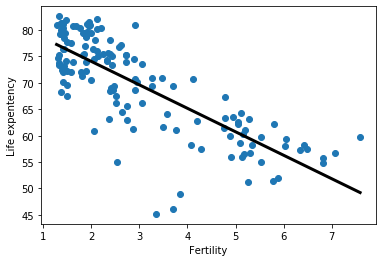

In [0]:
# Plot regression line
import matplotlib.pyplot as plt
plt.scatter(X_fertility, y)
plt.ylabel('Life expentency')
plt.xlabel('Fertility')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

**Train/test split for regression**

Here we split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. 

In addition to computing the R2 score, we also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models.

In [0]:
X = df.drop(['life', 'Region'], axis=1).values

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [0]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [0]:
# Create the regressor: reg_all
reg_all = LinearRegression()

In [0]:
# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(round(reg_all.score(X_test, y_test),2)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(round(rmse,2)))

R^2: 0.84
Root Mean Squared Error: 3.25


**Cross-validation**

Cross-validation is a technique that helps evaluation of model performance for regression models. 

The performance of a model is dependent on way the data is split, and is not representative of the model’s ability to generalize.

Cross-validation helps to resolve this, by spliting the training and testing data in different folds. 

**K-Fold CV comparison**

Cross validation is essential but the more folds used, the more computationally expensive cross-validation becomes.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1024px-K-fold_cross_validation_EN.svg.png)

In [0]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score 

In [0]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_all, X, y, cv=5)

**5 Fold Cross-Validation**

In [0]:
# Print the 5-fold cross-validation scores
print(np.round(cv_scores,3))

print("Average 5-Fold CV Score: {}".format(np.round(np.mean(cv_scores)),3))

[0.817 0.829 0.902 0.806 0.945]
Average 5-Fold CV Score: 1.0


**K-Fold CV comparison**

[0.846, 0.872, 0.873, 0.86, 0.866, 0.847, 0.85, 0.847, 0.844]


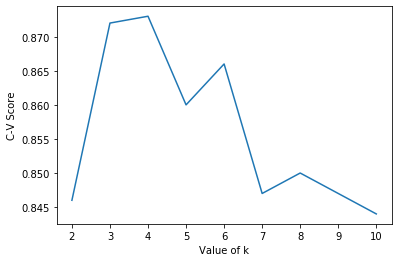

In [0]:
mean = []
k = []

for i in range(2,11):
  cv_scores = cross_val_score(reg_all, X, y, cv=i)
  mean.append(np.round(np.mean(cv_scores),3))
  k.append(i)

print(mean)

plt.xlabel('Value of k')
plt.ylabel('C-V Score')
plt.plot(k, mean)
plt.show()